Machine Learning Needs Data Analytics First

Before building ML models, you must:

Clean data,
Handle missing values,
Remove outliers,
Convert data types.

Perform EDA (Exploratory Data Analysis)

All this is Data Analytics work.

Without good data analytics → ML models fail.

Exploratory Data Analysis (EDA) – From Raw Data to Clean Data

Data rarely comes in perfect condition.
In this project, I worked with a small employee dataset that contained messy text, missing values, and inconsistent formatting.

Let’s walk step-by-step through how i cleaned and prepared the data for analysis.

Importing Required Libraries

I begin by importing the libraries that help us work with data:

pandas → Used for data manipulation and analysis,
numpy → Used for numerical operations and handling missing values,
matplotlib & seaborn → Used for data visualization

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

The dataset is loaded using pd.read_excel().
This converts the Excel file into a Pandas DataFrame, allowing structured data analysis.
Once loaded, the Excel file becomes a DataFrame, which allows us to analyze and clean the data easily.

In [241]:
emp=pd.read_excel(r'C:\Users\Amrutha Thalla\Downloads\Rawdata.xlsx')

In [242]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


Dataset Overview

The dataset contains employee information with the following columns:

Name → Employee Name
Domain → Employee job field
Age → Employee age (contains text + numbers)
Location → City of employee
Salary → Salary (contains special characters)
Exp → Years of experience (contains symbols)

Initial Data Inspection

Before cleaning, it is important to understand the structure of the data.

I used:

head() → To see the first few rows,
info() → To check data types and missing values,
describe() → To view statistical summary,
isnull().sum() → To count missing values.

This step helps us answer important questions:

How many rows and columns are there?
Which columns contain missing values?
Are data types correct?

I observed:

Missing values in Age, Location, and Experience,
Special characters in Name, Domain, Salary, and Experience columns,
All columns were stored as text (object type).

Clearly, cleaning was required.

In [243]:
emp.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [244]:
emp.isna()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [245]:
emp.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

Data cleaning

In [246]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


Cleaning Text Columns

Some columns contained unwanted special characters like:

Datascience#$,
5^00#0,
45' yr,
2+

To clean text columns like Name and Domain, I removed special characters using regular expressions:

In [247]:
emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [248]:
emp['Name']=emp['Name'].str.replace(r'\W','',regex=True)

In [249]:
emp['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [250]:
emp['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [251]:
emp['Domain']=emp['Domain'].str.replace(r'\W','',regex=True)

In [252]:
emp['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

Extracting Numeric Values

Columns like Age, Salary, and Experience contained text mixed with numbers.

Examples:

"34 years"
"5^00#0"
"4> yrs"

I extracted only the numeric part:

In [253]:
emp['Age']=emp['Age'].str.replace(r'\W','',regex=True)
emp['Age']

0    34years
1       45yr
2        NaN
3        NaN
4       67yr
5       55yr
Name: Age, dtype: object

In [254]:
emp['Age']=emp['Age'].str.extract('(\\d+)')
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [255]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5^00#0,2+
1,Teddy,Testing,45,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67,NaN,30000-,5+ year
5,Kim,NLP,55,Delhi,6000^$0,10+


In [256]:
emp['Salary'] = emp['Salary'].str.replace(r'\W', '', regex=True)

In [257]:
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [258]:
emp['Salary'] = emp['Salary'].str.extract('(\d+)')
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [259]:
emp['Exp'] = emp['Exp'].str.replace(r'\W', '', regex=True)

In [260]:
emp['Exp']

0        2
1        3
2     4yrs
3      NaN
4    5year
5       10
Name: Exp, dtype: object

In [261]:
emp['Exp'] = emp['Exp'].str.extract('(\d+)')
emp['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [262]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


Now the values are clean numbers instead of mixed text.

In [263]:
clean_data = emp.copy()   # always use copy

clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [264]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [265]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [266]:
clean_data.head(2)

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3


Handling Missing Values

I noticed missing values in:

Age,
Experience,
Location.

For Numerical Columns:

I replaced missing values with the mean of the column.

emp['Age'].fillna(emp['Age'].mean(), inplace=True),  
emp['Exp'].fillna(emp['Exp'].mean(), inplace=True)


Using mean helps maintain balance without removing data.

For Categorical Column (Location):

I replaced missing values with the most frequent value (mode).

emp['Location'].fillna(emp['Location'].mode()[0], inplace=True)

In [267]:
clean_data['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [268]:
clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))

In [269]:
clean_data['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [270]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [271]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [272]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

clean_data['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [273]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [274]:
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])
clean_data['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [275]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


Now the dataset has no missing values.

Converting Data Types

After extracting numeric values from columns like Age, Salary, and Experience, the data still remained in text (object) format.
Even though the values looked like numbers, Python still treated them as strings.

For example:

"34" is text
34 is a number

This difference is very important in data analysis.

Why Convert Data Types?

If columns remain as text:

We cannot calculate mean, median, or sum,
Sorting may behave incorrectly,
Mathematical operations will fail,
Machine learning models will not work properly.

So, converting the correct data type is a necessary step in data cleaning.

Converting Numeric Columns

I converted Age, Salary, and Experience into integer type:

In [276]:
clean_data['Age'] = clean_data['Age'].astype(int)
clean_data['Salary'] = clean_data['Salary'].astype(int)
clean_data['Exp'] = clean_data['Exp'].astype(int)

Converting Categorical Columns

Columns like:

Name,
Domain,
Location.

contain categorical (text-based) information.

Instead of keeping them as generic "object" type, I converted them into category type:

In [277]:
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')

In [278]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int64   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int64   
 5   Exp       6 non-null      int64   
dtypes: category(3), int64(3)
memory usage: 938.0 bytes


In [279]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


Data Visualization

Once the dataset is cleaned and properly formatted, the next step is to explore the data visually.

Visualization helps us:

Understand distribution of data,
Identify patterns,
Detect relationships,
Find trends and outliers.

Now that the data is clean and numeric, we can confidently create meaningful graphs.
lets apply EDA techniques

In [280]:
clean_data.to_csv('clean_data.csv')

In [281]:
import os
os.getcwd()

'C:\\Users\\Amrutha Thalla\\FSDS\\DataScience_AI'

In [282]:
clean_data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [283]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [284]:
clean_data['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

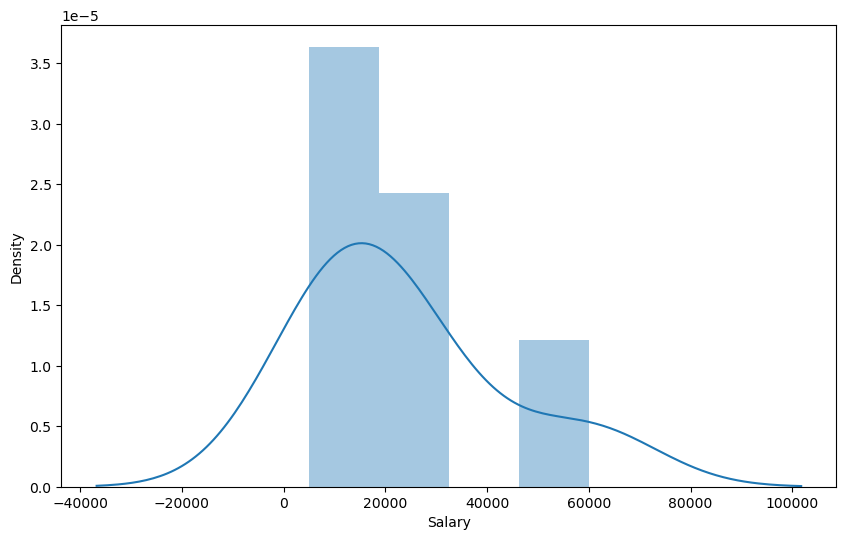

In [285]:
vis1 = sns.distplot(clean_data['Salary'])

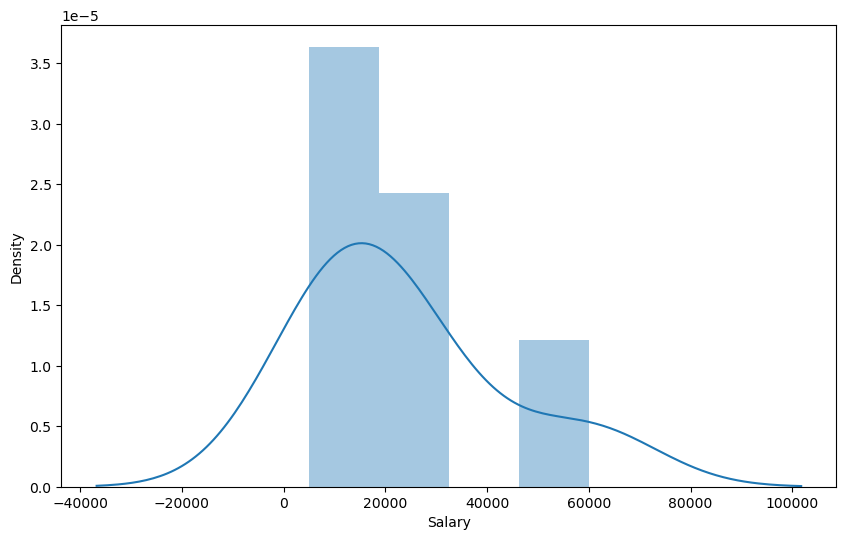

In [286]:
plt.rcParams['figure.figsize'] = 10,6
vis1 = sns.distplot(clean_data['Salary'])

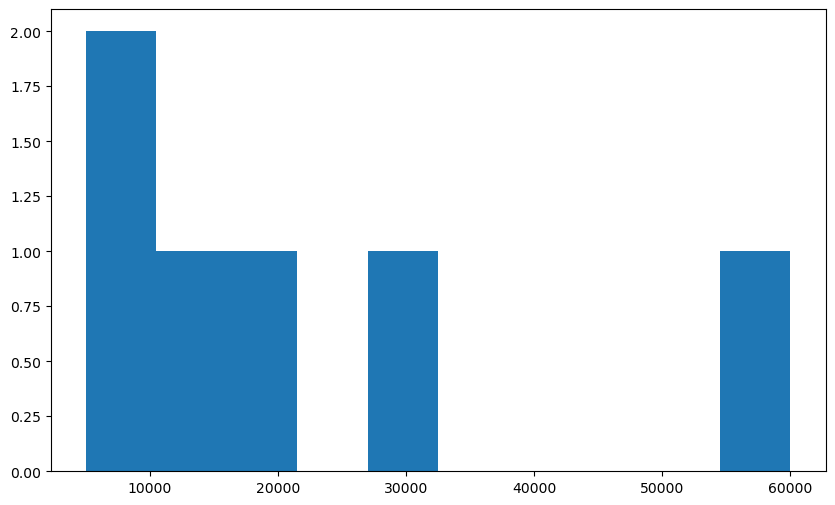

In [287]:
vis2 = plt.hist(clean_data['Salary'])

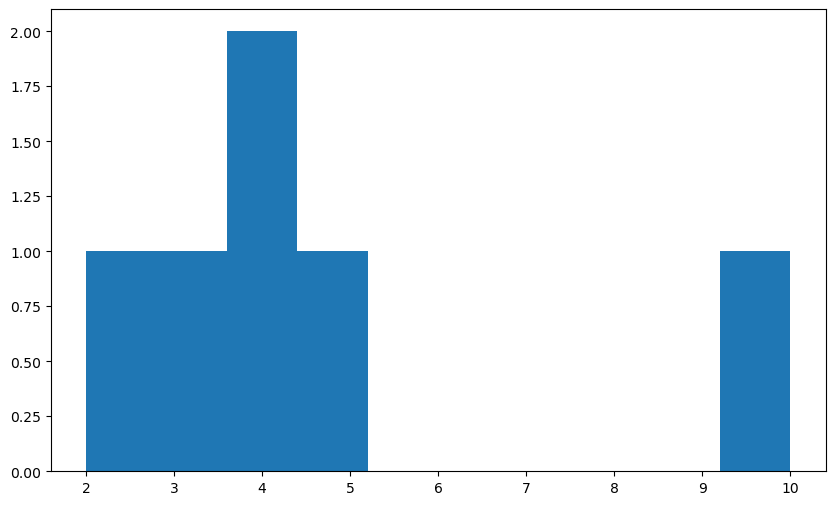

In [288]:
vis3 = plt.hist(clean_data['Exp'])

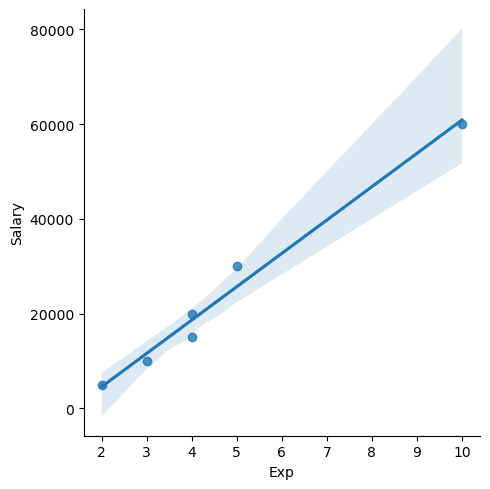

In [289]:
vis4 = sns.lmplot(data=clean_data,x = 'Exp', y='Salary')

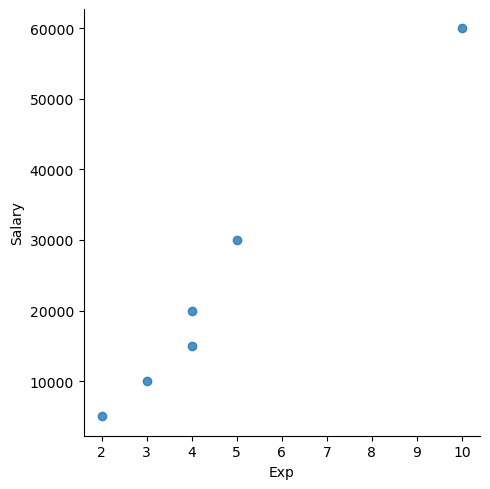

In [290]:
vis5 = sns.lmplot(data=clean_data,x = 'Exp', y='Salary', fit_reg = False)

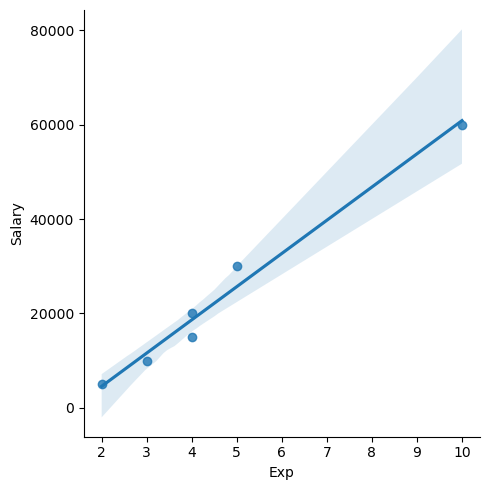

In [291]:
vis6 = sns.lmplot(data=clean_data,x = 'Exp', y='Salary', fit_reg = True)

In [292]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [293]:
clean_data[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [294]:
clean_data[:2]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3


In [295]:
clean_data[2:]

,Name,Domain,Age,Location,Salary,Exp
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [296]:
clean_data[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [297]:
clean_data[0:1]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2


In [298]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [299]:
x_iv = clean_data.drop(['Salary'],axis=1)

In [300]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [301]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [302]:
y_dv = clean_data.drop(['Name', 'Domain', 'Age', 'Location','Exp'],axis=1)

In [303]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [304]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [305]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [306]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [310]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


Encoding Categorical Variables

Since machine learning models cannot understand text, I convert categorical columns into numeric format using One-Hot Encoding:

This creates new columns like:

Name_Jane,
Domain_Testing,
Location_Mumbai.

In [311]:
imputation = pd.get_dummies(clean_data)

In [312]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,45,10000,3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,50,15000,4,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,50,20000,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False


Now the dataset is fully numeric.

Statistics
